<a href="https://colab.research.google.com/github/bradshimmin/bradshimmin/blob/main/AI_Skills_Tracker_Master_Charts_Generator_16apr24_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Skills Tracker charts
Last update: 11apr24


In [1]:
# Install libraries and import necessary modules.
import pandas as pd
import ast
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
print("all done")

all done


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Get secret keys
from google.colab import userdata

Anthropic_key = userdata.get('Anthropic_key')
OpenAI_key = userdata.get('OpenAI_key')

print("all done")

Mounted at /content/gdrive
all done


In [3]:
# Load DF
df = pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Datasets/ai_skills_tracker/ai_skills_1q24/ai_skills_comp_1Q24_for_eda.pkl')
print("all done")


all done


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276433 entries, 0 to 309032
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   RecordID                  252182 non-null  float64       
 1   Job title                 276433 non-null  object        
 2   Full job description      276433 non-null  object        
 3   Date collected            276433 non-null  object        
 4   Date posted               276433 non-null  datetime64[ns]
 5   Week                      276433 non-null  int64         
 6   Year                      276433 non-null  int64         
 7   Month                     276433 non-null  int64         
 8   Quarter                   276433 non-null  object        
 9   Hiring entity             276428 non-null  object        
 10  Entity size               254387 non-null  object        
 11  Home office hybrid work   276433 non-null  object        
 12  Full or

In [5]:
# create filter that's just 2H23 and 1Q24

# First convert 'Date posted' to datetime if not already
df['Date posted'] = pd.to_datetime(df['Date posted'])

# Create a mask for the first half of 2023
mask = (df['Date posted'] >= '2023-07-01') & (df['Date posted'] < '2024-04-01')

# Filter the dataframe using the mask and return it
df = df.loc[mask].copy()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71600 entries, 118141 to 309032
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   RecordID                  47349 non-null  float64       
 1   Job title                 71600 non-null  object        
 2   Full job description      71600 non-null  object        
 3   Date collected            71600 non-null  object        
 4   Date posted               71600 non-null  datetime64[ns]
 5   Week                      71600 non-null  int64         
 6   Year                      71600 non-null  int64         
 7   Month                     71600 non-null  int64         
 8   Quarter                   71600 non-null  object        
 9   Hiring entity             71595 non-null  object        
 10  Entity size               49554 non-null  object        
 11  Home office hybrid work   71600 non-null  object        
 12  Full or part time

# Some ad hoc EDA

In [7]:
# prompt: Create a dataframe that counts the number of jobs posted by a given set of companies each month, including Meta, TikTok, Apple, Google, and Microsoft.

# Create a list of companies to filter by
companies = ['Meta', 'TikTok', 'Apple', 'Google', 'Microsoft']

# Filter the dataframe for only these companies
df_filtered = df[df['Hiring entity'].isin(companies)]

# Group by 'Date posted' and resample by month, then count the number of posts for each company
monthly_posts_by_company = df_filtered.resample('M', on='Date posted')['Hiring entity'].value_counts().reset_index(name='Number_of_Posts')

# Print the table
print(monthly_posts_by_company)


   Date posted Hiring entity  Number_of_Posts
0   2023-07-31        TikTok               87
1   2023-07-31         Apple               67
2   2023-07-31     Microsoft               46
3   2023-07-31        Google               45
4   2023-07-31          Meta               38
5   2023-08-31        TikTok              107
6   2023-08-31        Google               52
7   2023-08-31         Apple               48
8   2023-08-31     Microsoft               47
9   2023-08-31          Meta               46
10  2023-09-30          Meta               88
11  2023-09-30        TikTok               80
12  2023-09-30         Apple               65
13  2023-09-30        Google               44
14  2023-09-30     Microsoft               30
15  2023-10-31        TikTok              185
16  2023-10-31         Apple              110
17  2023-10-31          Meta               49
18  2023-10-31        Google               46
19  2023-10-31     Microsoft               31
20  2023-11-30        TikTok      

In [8]:
# prompt: Using monthly_posts_by_company, print a line chart with smoothed interpolation that charts the number of posts made by each company month by month.

# Create a line chart with smoothed interpolation
fig = px.line(monthly_posts_by_company, x='Date posted', y='Number_of_Posts', color='Hiring entity', markers=True, render_mode='svg')
fig.update_traces(line=dict(shape='spline', smoothing=1.3))
fig.show()


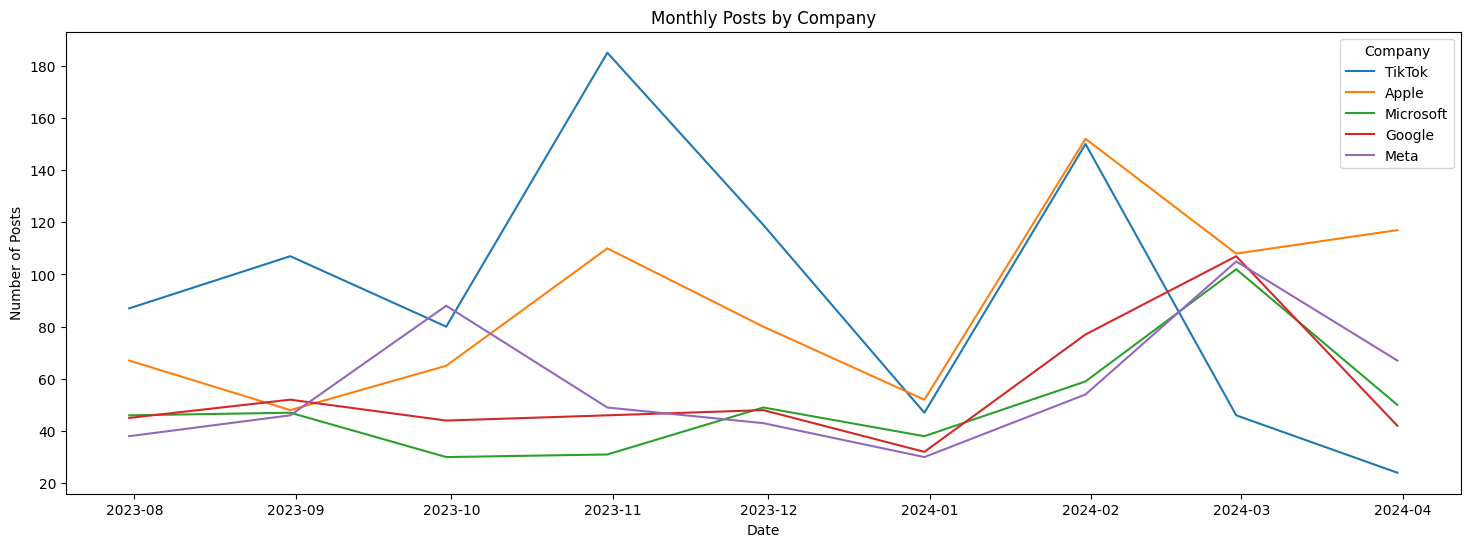

In [9]:
# Create a line chart of monthly posts by company
plt.figure(figsize=(18, 6))
sns.lineplot(data=monthly_posts_by_company, x='Date posted', y='Number_of_Posts', hue='Hiring entity')
plt.title('Monthly Posts by Company')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Company')
plt.show()


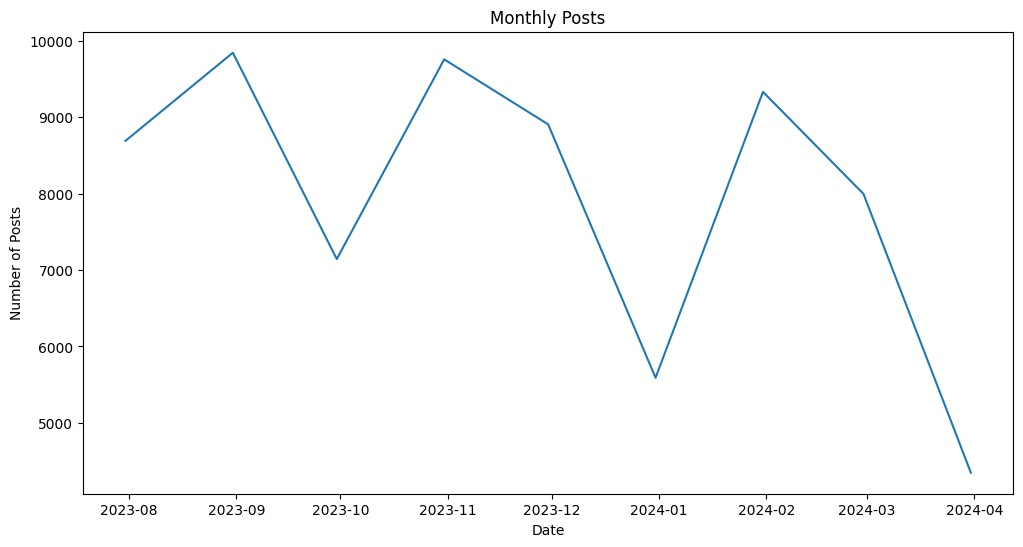

In [10]:
# Group by 'Date posted' and resample by month, then count the number of posts for each company
monthly_posts_by_date = df.resample('M', on='Date posted')['Date posted'].count().reset_index(name='Number_of_Posts')

# Create a line chart of monthly posts by company
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_posts_by_date, x='Date posted', y='Number_of_Posts')
plt.title('Monthly Posts')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


## Charts

### Figure 1: Job postings by technology

In [11]:
# Function: Set up counter for select technologies

def count_technologies(df, column, tech_list):
    """
    Function to count the number of times each technology in tech_list
    is mentioned in the given column of the dataframe.
    """
    tech_counts = {tech: df[column].apply(lambda x: tech.lower() in x.lower()).sum() for tech in tech_list}
    return tech_counts




In [12]:
# Figure 1: Job postings by technology, 2H23

tech_list = ['Predictive',
             'Natural language processing',
             'Computer Vision',
             'Generative AI',
             'Artificial general intelligence']

tech_counts = count_technologies(df, 'Full job description', tech_list)

tech_counts_df = pd.DataFrame.from_records([tech_counts])

tech_counts_df / len(df) * 100

,Predictive,Natural language processing,Computer Vision,Generative AI,Artificial general intelligence
0,11.22067,6.597765,5.810056,5.736034,0.02514


In [13]:
# Function: display changes for keywords over quarters

def keyword_quarterly(df, keyword):
    """take dataframe and keyword as arguments and print quarterly counts
    """
    # Filter the dataframe for records containing "keyword" in the "Full job description" column
    temp_df = df[df["Full job description"].str.contains(keyword, case = False, na=False)]

    # Group the filtered dataframe by quarter and count the number of posts
    posts_by_quarter = temp_df.groupby("Quarter").size()
    # percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size()) * 100
    percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size() * 100).map("{:.2f}%".format)

    return(percentage_posts_by_quarter)


In [14]:
# Figure 2 (old): Interest in OpenAI skills (old)
keyword_quarterly(df, "OpenAI")


Quarter
1Q24    1.09%
3Q23    0.75%
4Q23    0.87%
dtype: object

In [15]:
# Figure 2 (new)
# prompt: Create a dataframe containing the percentage of monthly job posts from df that contain a mention of the following list of values within "Full job description". Please use "Date posted" to do your calculations. The list of companies includes: OpenAI, Anthropic, Cohere.

import pandas as pd
# List of companies to search for
companies = ['OpenAI', 'Anthropic', 'Cohere']

# Create a new dataframe to store the results
company_mentions_df = pd.DataFrame()

# Iterate over the list of companies
for company in companies:
    # Calculate the percentage of monthly job posts that mention the company
    company_mentions_df[company] = df['Full job description'].str.contains(company, case=False).groupby(df['Date posted'].dt.to_period('M')).mean()

# Multiply by 100 to get percentages
company_mentions_df = company_mentions_df * 100

# Print the resulting dataframe
print(company_mentions_df)


               OpenAI  Anthropic    Cohere
Date posted                               
2023-07      0.609967   0.989757  0.414317
2023-08      0.873806   0.477545  0.538508
2023-09      0.741985   0.559989  0.461991
2023-10      0.912353   0.645823  0.594567
2023-11      0.786075   0.505334  0.437956
2023-12      0.947952   0.572348  0.375604
2024-01      0.718114   0.771704  0.450161
2024-02      1.325663   0.687844  0.712856
2024-03      1.448609   0.735801  0.574845


In [16]:
# Figure 4: Top job titles for all openings

# Get a list of the top employers
top_ents = df["Job title category"].value_counts() / len(df) * 100
top_ents = top_ents.rename_axis('unique_values').reset_index(name='counts')
top_ents = top_ents.head(25)
top_ents.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_ents, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [17]:
top_ents.head(25)

,unique_values,counts
0,Data Scientist AI,6.526536
1,IT Engineer AI,5.481844
2,Data Scientist Machine Learning,5.162011
3,IT Engineer Data Science,4.698324
4,IT Engineer Machine Learning,4.400838
5,Data Analyst Data Science,3.794693
6,Data and Analytics,3.339385
7,Data Architect AI,3.043296
8,Data Analyst Machine Learning,3.030726
9,Data Scientist Deep Learning,2.701117


In [18]:
# Function: Comparing counts across quarters

def compare_counts(df, column, periods, numb):
    result_frames = []
    for period in periods:
        df_period = df[df['Quarter'].isin(period)]
        counts = df_period[column].value_counts()
        # Normalize the counts by dividing by the total counts for the period
        normalized_counts = counts / counts.sum()
        result_frames.append(normalized_counts)

    merged_counts = pd.concat(result_frames, axis=1, keys=[f'{period[0]}-{period[-1]}' for period in periods])
    merged_counts.fillna(0, inplace=True)

    merged_counts['Difference'] = merged_counts.iloc[:, 1] - merged_counts.iloc[:, 0]
    merged_counts['Percent change (%)'] = (merged_counts['Difference'] / merged_counts.iloc[:, 0]) * 100

    merged_counts = merged_counts.nlargest(numb, merged_counts.columns[0])

    return merged_counts



In [19]:
# New figure 5: Job titles waxing and waning
compare_counts(df, 'Job title category', [['3Q23', '4Q23'], ['1Q24']], 20)

,3Q23-4Q23,1Q24-1Q24,Difference,Percent change (%)
Job title category,,,,
Data Scientist AI,0.052899,0.093749,0.040849,77.220627
IT Engineer AI,0.050656,0.064406,0.013750,27.143908
IT Engineer Data Science,0.045108,0.051303,0.006196,13.735324
IT Engineer Machine Learning,0.044927,0.041892,-0.003036,-6.757149
Data Scientist Machine Learning,0.040180,0.077970,0.037790,94.050490
Data Analyst Data Science,0.036014,0.042399,0.006385,17.729362
Data Analyst Machine Learning,0.033871,0.022099,-0.011772,-34.754453
Data and Analytics,0.031387,0.038016,0.006629,21.120368
Data Scientist Deep Learning,0.030205,0.019654,-0.010551,-34.932035


In [20]:
# Figure 5 (extra): Top job title profiles
df['Job title category'].value_counts().nlargest(10)

Job title category
Data Scientist AI                  4673
IT Engineer AI                     3925
Data Scientist Machine Learning    3696
IT Engineer Data Science           3364
IT Engineer Machine Learning       3151
Data Analyst Data Science          2717
Data and Analytics                 2391
Data Architect AI                  2179
Data Analyst Machine Learning      2170
Data Scientist Deep Learning       1934
Name: count, dtype: int64

In [21]:
# Figure 5 (extra): Top job title profiles
compare_counts(df, 'City', [['3Q23', '4Q23'], ['1Q24']], 20)



,3Q23-4Q23,1Q24-1Q24,Difference,Percent change (%)
City,,,,
No data,0.094224,0.000000,-0.094224,-100.000000
New York,0.027106,0.029831,0.002725,10.053605
San Francisco,0.021768,0.026082,0.004314,19.819158
Singapore,0.021593,0.012157,-0.009435,-43.697317
Bengaluru,0.021527,0.010443,-0.011084,-51.486803
Washington,0.019974,0.020084,0.000110,0.549722
Seattle,0.019667,0.030206,0.010538,53.581815
London,0.017086,0.010229,-0.006857,-40.130902
Austin,0.013564,0.017566,0.004003,29.509771


In [22]:
df['Hiring entity'].value_counts().nlargest(10)

Hiring entity
TikTok           845
Apple            799
Dice             648
ClearanceJobs    622
Meta             520
Google           493
Microsoft        452
Capgemini        429
Genius Sports    421
Walmart          409
Name: count, dtype: int64

In [23]:
# Figure 6: Hiring entities: Top companies

# Get a list of the top employers
top_ents = df["Hiring entity"].value_counts() / len(df) * 100
top_ents = top_ents.rename_axis('unique_values').reset_index(name='counts')
top_ents = top_ents.head(25)
top_ents.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_ents, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [24]:
# Figure 7: Hiring entities by category

# compare_counts(df, 'Hiring entity', [['1Q23', '2Q23'], ['3Q23', '4Q23']])
hiring_entities = compare_counts(df, 'Hiring entity', [['3Q23'], ['4Q23'], ['1Q24']], 10)
hiring_entities = hiring_entities.reset_index()
hiring_entities.head(100)

,Hiring entity,3Q23-3Q23,4Q23-4Q23,1Q24-1Q24,Difference,Percent change (%)
0,ClearanceJobs,0.014139,0.006145,0.005075,-0.007994,-56.539246
1,TikTok,0.010672,0.014475,0.010151,0.003803,35.635748
2,Capgemini,0.008374,0.005526,0.003691,-0.002848,-34.009115
3,Dice,0.007517,0.017156,0.001799,0.009639,128.219965
4,Crossover,0.007362,0.004083,0.000461,-0.003279,-44.538578
5,Apple,0.007011,0.009980,0.017395,0.002969,42.350984
6,Meta,0.006699,0.005031,0.010428,-0.001668,-24.898433
7,Booz Allen Hamilton,0.006660,0.004660,0.003784,-0.002000,-30.031922
8,JPMorgan Chase & Co,0.006388,0.003959,0.006414,-0.002429,-38.020938
9,Deloitte,0.006349,0.005031,0.005122,-0.001317,-20.751721


In [25]:
len(df['Job title category'].isna())


71600

In [26]:
# Fix some odd City and title category NaNs and No datas.
temp_df = df.copy()
temp_df = df.dropna(subset=['Job title category'])
temp_df = temp_df[temp_df['City'] != 'No data']

In [27]:
# Figure 8

# Get top 5 'Job title category' entries
top_5_categories = temp_df['Job title category'].value_counts().nlargest(5).index.tolist()

# Filter df for the top 5 categories
df_top5 = temp_df[temp_df['Job title category'].isin(top_5_categories)]

# Define your custom color scale
colors = ['#49ACF8', '#3472E4', '#731AED', '#6D2CA7', '#A54EAC', '#EB4EAC']

# Create a color dictionary for mapping categories to colors
color_dict = {category: color for category, color in zip(top_5_categories, colors)}

# Count job posts for each 'City', 'Longitude', 'Latitude', and 'Job title category'
df_map_city = df_top5.groupby(['City', 'Longitude', 'Latitude', 'Job title category']).size().reset_index(name='Count')

fig = px.scatter_geo(df_map_city, lon='Longitude', lat='Latitude',
                     color='Job title category', size='Count',
                     hover_name='City', title='Job Posts by City for Top 5 Job Title Categories in 2H23, 1Q24',
                     labels={'Count':'Number of Job Posts'},
                     color_discrete_map=color_dict)
fig.update_layout(width=1200, height=800)

fig.update_traces(marker=dict(opacity=0.7))  # Make markers partially transparent

fig.show()


In [28]:
df_map_city

,City,Longitude,Latitude,Job title category,Count
0,100 Mile House,-121.312520,51.642693,IT Engineer AI,1
1,Abbott,-97.072197,31.885080,IT Engineer AI,2
2,Aberdeen,-76.162682,39.511040,IT Engineer AI,1
3,Aberdeen,-76.162682,39.511040,IT Engineer Machine Learning,2
4,Aberdeen,-76.162680,39.511040,IT Engineer AI,1
...,...,...,...,...,...
4260,Ã‡ankaya,32.853910,39.921090,IT Engineer AI,2
4261,ÅÃ³dÅº,19.475020,51.772340,IT Engineer AI,1
4262,Đà Nẵng,108.223610,16.074631,IT Engineer AI,1
4263,Đà Nẵng,108.223610,16.074631,IT Engineer Data Science,1


In [29]:
df['AI skills'].iloc[2]
print(df['AI skills'].dtype)

object


In [30]:
# prompt: convert the datatype for 'AI skills' and 'AI technologies' to strings.

df['AI skills'] = df['AI skills'].astype(str)
df['AI technologies'] = df['AI technologies'].astype(str)


In [31]:
df['AI skills'].iloc[2]

'Finance Technology, Sql, Redshift, Amazon Finance Technology, Iamaws, Data Modeling, S3, Data Engineer, Amazon, Columnar, Cloud, Aws Glue, Recognize, Kinesis, Etl, Firehose'

In [32]:
df_skills = df.drop_duplicates(subset='AI skills')

In [33]:
# prompt: explode 'AI skills' so that we have one row for each comma delimited entry in the 'AI skills" column

df_skills['AI skills'] = df['AI skills'].apply(lambda x: x.split(','))
df_skills = df_skills.explode('AI skills')


<ipython-input-33-fca4ec574c20>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# Figure 9: Top AI skills for 2H23

# Get value counts
skills_counts = df_skills['AI skills'].value_counts().nlargest(200)

# Convert to DataFrame
df_skills_counts = skills_counts.reset_index()

# Rename columns
df_skills_counts.columns = ['AI skills', 'counts']

# show dataframe
df_skills_counts

,AI skills,counts
0,'BUSINESS',23021
1,'DESIGN',21407
2,'SOFTWARE',17830
3,'SUPPORT',17644
4,'MACHINE LEARNING',15989
...,...,...
195,Big Data,878
196,'DISTRIBUTED COMPUTING',864
197,'DATA EXTRACTION',862
198,Ms,857


In [35]:
# Figure 9: Top skills

# Get a list of the top employers
top_items = df_skills["AI skills"].value_counts() / len(df) * 100
top_items = top_items.rename_axis('unique_values').reset_index(name='counts')
top_items = top_items.head(25)
top_items.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_items, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [36]:
df_tech = df.drop_duplicates(subset='AI technologies')

In [37]:
df_tech['AI technologies'].iloc[2]

'Data Platform, Software, Cloud, Business, Data Warehouses, Data And Analytics, Big Data, Communication Skills, Data Stores, Data Transformation, Data Engineering, Design, Data Modeling, Documentation, Data Warehousing, Data Integrity, Integration, Quantitative Analysis, Ambiguity, Finance, Graph Databases, Data Warehouse, Big Data Technologies, Development, Rdbms, Compliance, Support, Databases, Analysis, Automation, Management, Relational Databases, Analysis Skills, Identity & Access Management'

In [38]:
# prompt: explode 'AI skills' so that we have one row for each comma delimited entry in the 'AI skills" column

df_tech['AI technologies'] = df_tech['AI technologies'].apply(lambda x: x.split(','))
df_tech = df_tech.explode('AI technologies')


<ipython-input-38-4a9fe5bb16d9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
# Figure 10: Top AI tech
# Get value counts
tech_counts = df_tech['AI technologies'].value_counts().nlargest(200)

# Convert to DataFrame
df_tech_counts = skills_counts.reset_index()

# Rename columns
df_tech_counts.columns = ['AI technologies', 'counts']

# show dataframe
df_tech_counts

,AI technologies,counts
0,'BUSINESS',23021
1,'DESIGN',21407
2,'SOFTWARE',17830
3,'SUPPORT',17644
4,'MACHINE LEARNING',15989
...,...,...
195,Big Data,878
196,'DISTRIBUTED COMPUTING',864
197,'DATA EXTRACTION',862
198,Ms,857


In [40]:
# Figure 10: Top skills

# Get a list of the top employers
top_items = df_tech["AI technologies"].value_counts() / len(df) * 100
top_items = top_items.rename_axis('unique_values').reset_index(name='counts')
top_items = top_items.head(25)
top_items.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_items, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [41]:
# Figure 9: convert manually curated list into a dataframe
tech_dict = {
    "MACHINE LEARNING": 15989,
    "ANALYSIS": 14125,
    "DEVELOPMENT": 13930,
    "CLOUD": 12962,
    "ANALYTICS": 9881,
    "DATA SCIENCE": 9768,
    "SECURITY": 9087,
    "TESTING": 8536,
    "LANGUAGES": 8246,
    "DATA ANALYSIS": 7057,
    "ALGORITHMS": 7016,
    "DATABASES": 7013,
    "DESIGNING": 6881,
    "DOCUMENTATION": 6837,
    "DATABASE": 6753,
    "STATISTICS": 6185,
    "MODELING": 6132,
    "DEPLOYMENT": 5584,
    "INTEGRATION": 5462,
    "SUPPORT": 5347,
    "OPTIMIZATION": 5228,
    "DATA ENGINEERING":	4179,
    "DATA QUALITY":	3943,
    "BIG DATA":	3905,
    "CODING":	3866,
}
df_tech_list = pd.DataFrame.from_dict(tech_dict, orient='index', columns=['Count'])
df_tech_list.reset_index(inplace=True)

In [42]:
df_tech_list.head()

,index,Count
0,MACHINE LEARNING,15989
1,ANALYSIS,14125
2,DEVELOPMENT,13930
3,CLOUD,12962
4,ANALYTICS,9881


In [43]:
# Figure 10: Top tech

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(df_tech_list, path=['index'], values='Count', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()


In [44]:
len(df)

71600

In [45]:
9245 / 71600 * 100

12.912011173184357

In [46]:
# Figure 11: Top programming languages
# Get value counts
tech_counts = df_tech['AI technologies'].value_counts().nlargest(200)

# Convert to DataFrame
df_tech_counts = tech_counts.reset_index()

# Rename columns
df_tech_counts.columns = ['AI technologies', 'counts']

# show dataframe
df_tech_counts


,AI technologies,counts
0,Business,14975
1,Development,14418
2,Support,13188
3,Design,12088
4,'AI',9847
...,...,...
195,Mysql,762
196,'MATLAB',756
197,'APACHE SPARK',753
198,'POWER',746


In [47]:
# Figure 12: Hiring priorities for ML frameworks

ml_frameworks = [r'\bTensorFlow\b', r'\bPyTorch\b', r'\bScikit\b', r'\bKeras\b', r'\bXGBoost\b',
                 r'\bMXNet\b', r'\bJAX\b', r'\bHuggingFace\b', r'\bONNX\b', r'\bLightGBM\b',
                 r'\bLightning\b', r'\bProphet\b', r'\bCaffe2\b', r'\bCatBoost\b',
                 r'\bFast.ai\b', r'\bMLX\b', r'\bAutoGen\b', r'\bLangChain\b', r'\bRay Serve\b',
                 r'\bOpenLLM\b', r'\bvLLM\b', r'\bLlamaIndex\b', r'\bHaystack\b',]


# Initialize an empty dictionary to store the percentages
percentages = {}

# Get the total number of rows in the DataFrame
total_rows = len(df)

# Loop over the ML frameworks
for framework in ml_frameworks:
    # Use str.contains() with regex=True to check if the framework is in each row of 'Full job description'
    # Sum up the True values to get the count
    count = df['Full job description'].str.contains(framework, case=False, na=False, regex=True).sum()

    # Calculate the percentage and store it in the dictionary
    percentages[framework] = (count / total_rows) * 100

# Convert the dictionary to a DataFrame and remove regex characters from 'Language' column
df_percentages = pd.DataFrame(list(percentages.items()), columns=['ML Framework', 'Percentage'])
df_percentages['ML Framework'] = df_percentages['ML Framework'].str.replace(r'\b', '')
df_percentages.head(30)



,ML Framework,Percentage
0,TensorFlow,11.536313
1,PyTorch,11.096369
2,Scikit,5.331006
3,Keras,3.124302
4,XGBoost,0.695531
5,MXNet,0.488827
6,JAX,0.546089
7,HuggingFace,0.553073
8,ONNX,0.283520
9,LightGBM,0.103352


In [48]:
df_percentages.head(30)

,ML Framework,Percentage
0,TensorFlow,11.536313
1,PyTorch,11.096369
2,Scikit,5.331006
3,Keras,3.124302
4,XGBoost,0.695531
5,MXNet,0.488827
6,JAX,0.546089
7,HuggingFace,0.553073
8,ONNX,0.283520
9,LightGBM,0.103352


In [49]:
# Function to display changes for keywords over quarters
def keyword_quarterly(df, keyword):
    """take dataframe and keyword as arguments and print quarterly counts
    """
    # Filter the dataframe for records containing "keyword" in the "Full job description" column
    temp_df = df[df["Full job description"].str.contains(keyword, case = False, na=False)]

    # Group the filtered dataframe by quarter and count the number of posts
    posts_by_quarter = temp_df.groupby("Quarter").size()
    # percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size()) * 100
    percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size() * 100).map("{:.2f}%".format)


    return(percentage_posts_by_quarter)


In [50]:
keyword_quarterly(df, "OpenAI")


Quarter
1Q24    1.09%
3Q23    0.75%
4Q23    0.87%
dtype: object

In [51]:
keyword_quarterly(df, "AutoML")

Quarter
1Q24    0.25%
3Q23    0.27%
4Q23    0.29%
dtype: object

In [52]:
keyword_quarterly(df, "low-code")

Quarter
1Q24    0.17%
3Q23    0.51%
4Q23    0.17%
dtype: object

In [53]:
keyword_quarterly(df, "LLM")

Quarter
1Q24    9.33%
3Q23    6.11%
4Q23    6.68%
dtype: object

In [54]:
keyword_quarterly(df, "large language models")

Quarter
1Q24    4.21%
3Q23    3.00%
4Q23    2.97%
dtype: object

In [55]:
# Filter the dataframe for records containing "GenAI" in the "Full job description" column
filtered_df = df[df["Full job description"].str.contains("generative ai", case = False, na=False)]

# Group the filtered dataframe by quarter and count the number of posts
posts_by_quarter = filtered_df.groupby("Quarter").size()

# Calculate the percentage of posts by quarter
# percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size()) * 100
percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size() * 100).map("{:.2f}%".format)

# Display the percentage of posts by quarter
print(percentage_posts_by_quarter)


Quarter
1Q24    7.44%
3Q23    4.84%
4Q23    5.16%
dtype: object


In [56]:
# prompt: create a new dataframe called gen_ai that contains any one of several keywords within "Full job description".

gen_ai_keywords = ["Generative AI", "GenAI", "Large Language Models", "LLMs", "Foundation Models"]
gen_ai = df[df['Full job description'].str.contains('|'.join(gen_ai_keywords))]


In [57]:
gen_ai.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
RecordID,3282.0,216774.949421,118165.0,132492.5,265459.0,275135.25,284155.0,70365.839227
Date posted,4758,2023-11-25 12:23:54.552332800,2023-07-01 00:00:00,2023-09-14 00:00:00,2023-11-29 00:00:00,2024-02-04 00:00:00,2024-03-18 00:00:00,NaN
Week,4758.0,25.697352,1.0,7.0,31.0,42.0,51.0,17.313626
Year,4758.0,2023.418243,2023.0,2023.0,2023.0,2024.0,2024.0,0.493322
Month,4758.0,6.343632,1.0,2.0,8.0,10.0,12.0,4.006699
Number of applicants,1107.0,43.197832,0.0,9.0,26.0,61.0,199.0,46.985836
Longitude,4758.0,-72.354439,-157.85788,-121.885422,-94.209488,-74.007141,153.02335,64.021776
Latitude,4758.0,37.046787,-37.81739,35.689457,38.93681,41.884251,65.010353,11.291191
Salary start,4758.0,91853.965111,24075.0,86048.25,91261.5,98139.0,155467.0,16932.975886
Salary end,4758.0,139510.241908,72542.0,118963.5,137217.5,158444.75,222220.0,24935.5505


In [58]:
# Filter for gen ai on 2H23 data
# gen_ai = df[df["Full job description"].str.contains("generative ai", case = False, na=False)]


In [59]:
# Figure 13: Top AI companies hiring generative AI skills for 2H23

# Get value counts
ent_counts = gen_ai['Hiring entity'].value_counts().nlargest(200)

# Convert to DataFrame
ent_counts = ent_counts.reset_index()

# Rename columns
ent_counts.columns = ['Hiring entity', 'counts']

# show dataframe
ent_counts


,Hiring entity,counts
0,Apple,102
1,Meta,81
2,Microsoft,77
3,Deloitte,76
4,Capital One,72
...,...,...
195,onsemi,4
196,Flagship Pioneering,4
197,Moody's,4
198,Cloudera,4


In [60]:
# # Curated list

# companies_dict = {
#     'Meta': 55,
#     'Deloitte': 51,
#     'Apple': 48,
#     'TikTok': 41,
#     'NVIDIA': 38,
#     'Capital One': 38,
#     'Amazon Web Services, Inc.': 37,
#     'IBM': 35,
#     'Salesforce': 30,
#     'Microsoft': 28,
#     'Google': 28,
#     'Amazon.com Services LLC': 26,
#     'Capgemini': 24,
#     'Grammarly, Inc.': 23,
#     'SAP': 23,
#     'Mayo Clinic': 21,
#     'Walmart': 20,
#     'Adobe': 20,
#     'HP': 17,
#     'Dell Technologies': 16,
#     'Amazon Development Center U.S., Inc.': 16,
#     'Cognizant': 15,
#     'Citi': 14,
#     'ServiceNow': 14,
#     'Scale AI': 12,
#     'Cognizant Technology Solutions': 11,
#     'Visa': 11,
#     'EY': 10,
#     'Oracle': 9,
#     'Booz Allen Hamilton': 9,
#     'Pinterest': 9,
#     'Atlassian': 9,
#     'Amazon': 8,
#     'Boeing': 8,
#     'Discord': 8
# }

# ent_list = pd.DataFrame.from_dict(companies_dict, orient='index', columns=['Count'])
# ent_list.reset_index(inplace=True)


In [61]:
# Figure 13: Top GenAI hiring entities

# Get a list of the top employers
top_ents = gen_ai["Hiring entity"].value_counts() / len(gen_ai) * 100
top_ents = top_ents.rename_axis('unique_values').reset_index(name='counts')
top_ents = top_ents.head(25)
top_ents.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_ents, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [62]:
# Figure 14: Generative AI growth

keyword_quarterly(df, "GenAI")

Quarter
1Q24    1.95%
3Q23    0.58%
4Q23    1.04%
dtype: object

In [63]:
# Figure 15
top_10_job_titles = (gen_ai['Job title category'].value_counts() / len(gen_ai) * 100).head(10).reset_index()
top_10_job_titles.columns = ['Job Title Category', 'Percentage']
top_10_job_titles


,Job Title Category,Percentage
0,Data Scientist AI,18.537201
1,IT Engineer AI,15.741908
2,Data Architect AI,6.977722
3,Machine Learning Engineer AI,4.918033
4,Data and Analytics,4.749895
5,IT Engineer Machine Learning,3.930223
6,Machine Learning Scientist AI,3.804119
7,Data Scientist Deep Learning,3.593947
8,Data Scientist Machine Learning,3.047499
9,MLOps Engineer AI,2.879361


In [64]:
# Models
models = [r'\bBERT \b', r'\bLlama\b', r'\bOpenLLaMA\b', r'\bFalcon\b', r'\bDolly\b',
          r'\bMPT\b', r'\bGuanaco\b', r'\bBloom\b', r'\bAlpaca\b', r'\bLaMDA\b',
          r'\bYi\b', r'\bVicuna\b', r'\bRoBERTa\b',
          r'\bFlan\b', r'\bHermes\b', r'\bMixtral\b', r'\bMistral\b',
          r'\bQWEN\b', r'\bChinchilla\b', r'\bPhi\b', r'\bStableLM\b', r'\bPythia\b',
          r'\bCodegen\b', r'\bTinyLlama\b', r'\bStarCoder\b', r'\bCodeLlama\b',
          r'\bLLaVA\b', r'\bMomba\b', r'\bOrca\b',
          r'\bCodex\b', r'\bGiraffe\b', r'\bGemma\b', r'\bMixtral\b',
          r'\bCommand-r\b', r'\bJamba\b', r'\bDolphin\b', r'\bDBRX\b',
          r'\bWhisper\b', r'\bStarcoder\b', r'\bGPT-2\b', r'\bZephyr\b', r'\bOrca\b', r'\bReplit\b'
          ]

# Initialize an empty dictionary to store the percentages
percentages = {}

# Get the total number of rows in the DataFrame
total_rows = len(gen_ai)

# Loop over the ML frameworks
for model in models:
    # Use str.contains() with regex=True to check if the framework is in each row of 'Full job description'
    # Sum up the True values to get the count
    count = gen_ai['Full job description'].str.contains(model, case=False, na=False, regex=True).sum()

    # Calculate the percentage and store it in the dictionary
    percentages[model] = (count / total_rows) * 100

# Convert the dictionary to a DataFrame and remove regex characters from 'Language' column
df_percentages = pd.DataFrame(list(percentages.items()), columns=['Model', 'Percentage'])
df_percentages['Model'] = df_percentages['Model'].str.replace(r'\b', '')

In [65]:
# Figure 15: Top Generative AI Models (comparing proprietary and open source)
df_percentages.head(25)

,Model,Percentage
0,BERT,0.882724
1,Llama,4.434636
2,OpenLLaMA,0.000000
3,Falcon,0.861707
4,Dolly,0.294241
5,MPT,0.084069
6,Guanaco,0.000000
7,Bloom,0.441362
8,Alpaca,0.000000
9,LaMDA,0.168138


In [66]:
# Figure 13: Top GenAI hiring entities

# Get a list of the top employers
# top_models = gen_ai["Model"].value_counts() / len(gen_ai) * 100
# top_ents = top_ents.rename_axis('unique_values').reset_index(name='counts')
# top_ents = top_ents.head(25)
# top_ents.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(df_percentages, path=['Model'],values='Percentage', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [67]:
# Assuming df_percentages has a third column 'Another_Variable'
fig = px.scatter(df_percentages, x='Model', y='Percentage', title='Percentage of Each Model vs Another Variable')
fig.show()



In [68]:
# take a look at Generative AI solaries
sal_end = gen_ai['Salary end'].mean()
sal_str = gen_ai['Salary start'].mean()
print(f'Mean salary: {sal_str + sal_end / 2}')

Mean salary: 161609.0860655738


In [69]:
# Check on most popular job titles
gen_ai['Job title category'].value_counts().nlargest(10) / len(gen_ai) * 100


Job title category
Data Scientist AI                  18.537201
IT Engineer AI                     15.741908
Data Architect AI                   6.977722
Machine Learning Engineer AI        4.918033
Data and Analytics                  4.749895
IT Engineer Machine Learning        3.930223
Machine Learning Scientist AI       3.804119
Data Scientist Deep Learning        3.593947
Data Scientist Machine Learning     3.047499
MLOps Engineer AI                   2.879361
Name: count, dtype: float64

In [75]:
gen_ai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4758 entries, 118164 to 308980
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   RecordID                  3282 non-null   float64       
 1   Job title                 4758 non-null   object        
 2   Full job description      4758 non-null   object        
 3   Date collected            4758 non-null   object        
 4   Date posted               4758 non-null   datetime64[ns]
 5   Week                      4758 non-null   int64         
 6   Year                      4758 non-null   int64         
 7   Month                     4758 non-null   int64         
 8   Quarter                   4758 non-null   object        
 9   Hiring entity             4757 non-null   object        
 10  Entity size               3594 non-null   object        
 11  Home office hybrid work   4758 non-null   object        
 12  Full or part time 

--------------- Top 5 Job title category:
Job title category
Data Scientist AI               19.446845
IT Engineer AI                  16.738692
Data Architect AI                6.914434
Data and Analytics               5.301066
Machine Learning Engineer AI     4.580812
Name: count, dtype: float64
--------------- Top 5 Entity size:
Entity size
10000+ Employees          37.481994
1001 to 5000 Employees     6.943244
Unknown                    4.926534
1 to 50 Employees          4.263901
51 to 200 Employees        4.062230
Name: count, dtype: float64
--------------- Top 5 Home office hybrid work:
Home office hybrid work
Office    80.927687
Remote    18.006338
Hybrid     1.065975
Name: count, dtype: float64
--------------- Top 5 Full or part time status:
Full or part time status
Full-time              64.794007
Contract                6.309421
Full-time; Contract     1.065975
Internship              0.979545
Part-time               0.893114
Name: count, dtype: float64
--------------- Top 5

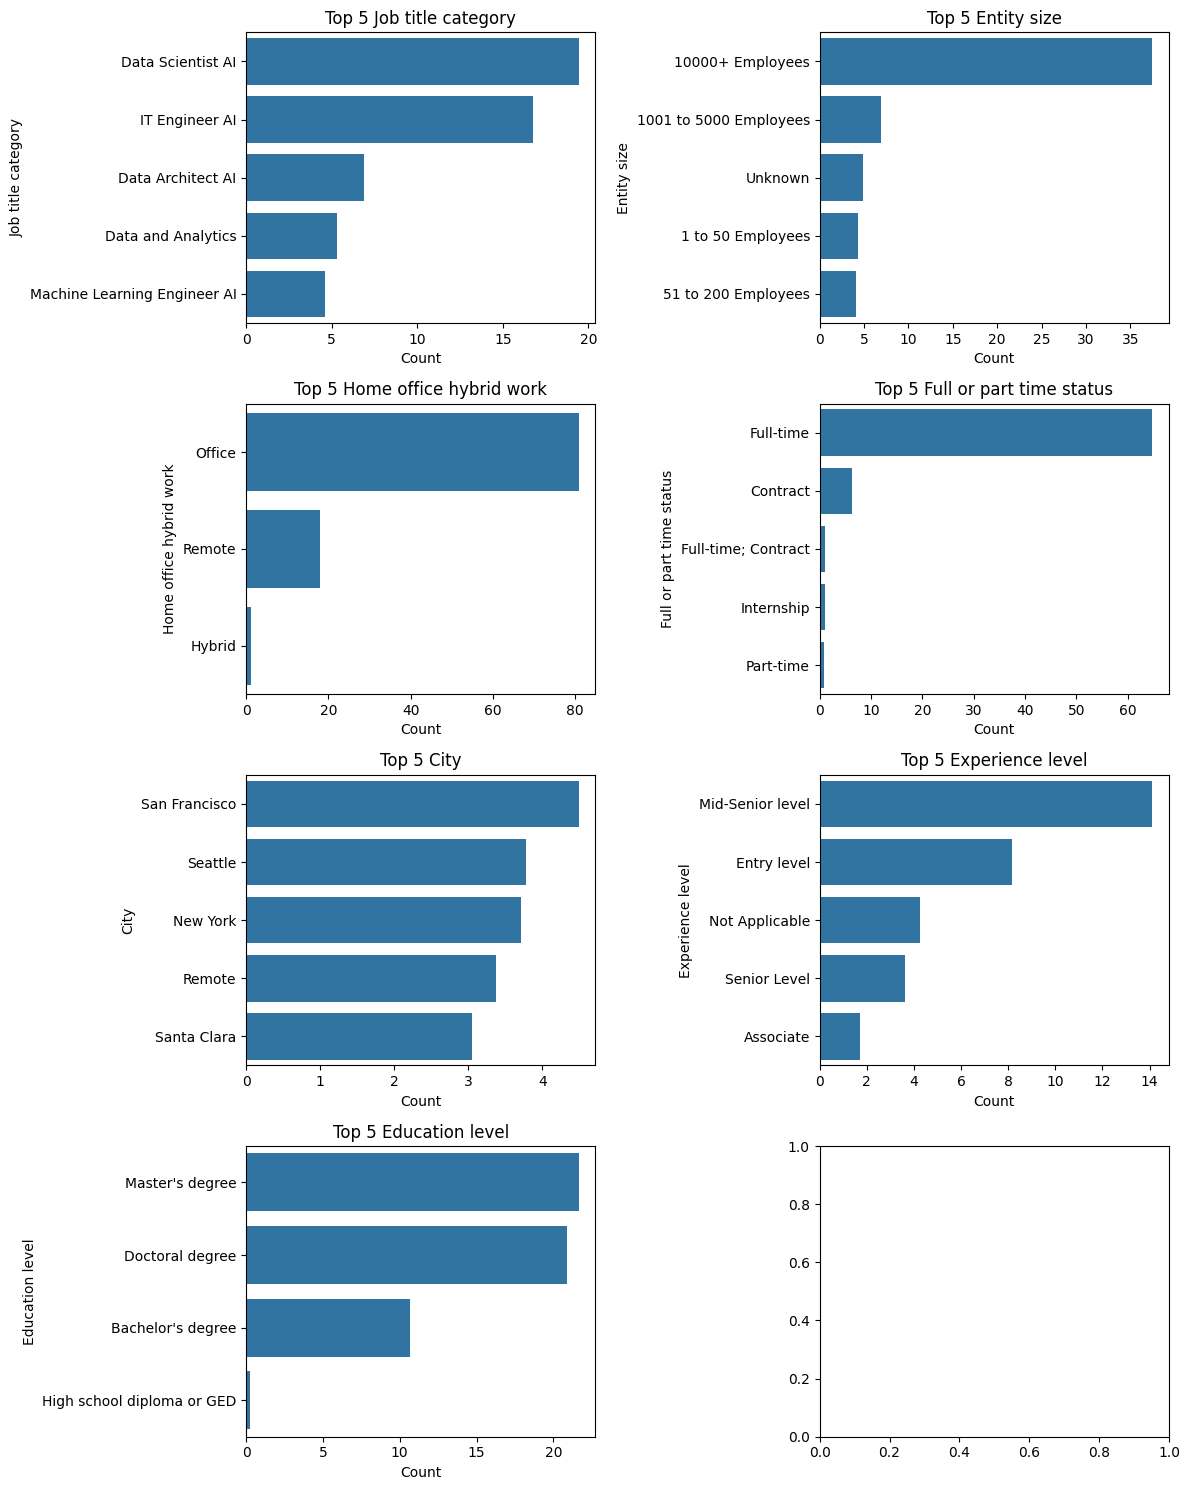

In [84]:
# Fig 17

# Filter out the specified columns
columns_of_interest = ['Job title category', 'Entity size', 'Home office hybrid work', 'Full or part time status', 'City', 'Experience level', 'Education level']
filtered_df = gen_ai[columns_of_interest]

# Remove rows with "No data" in any of the specified columns
filtered_df = filtered_df[~filtered_df.isin(['No data']).any(axis=1)]

# Initialize a figure and axis object
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

# Iterate over each column and plot the top five values
for idx, col in enumerate(filtered_df.columns):
    # Count occurrences of unique values and select the top five
    top_values = filtered_df[col].value_counts().head(5) / len(filtered_df) * 100

    # Print the top five values
    print("---" * 5, f"Top 5 {col}:")
    print(top_values)
    # Plot the bar chart
    ax = axes[idx//2, idx%2]
    sns.barplot(x=top_values.values, y=top_values.index, ax=ax)
    ax.set_title(f"Top 5 {col}")
    ax.set_xlabel("Count")
    ax.set_ylabel(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [78]:
top_values

Education level
Bachelor's degree             7961
Master's degree               5745
Doctoral degree               4030
High school diploma or GED     264
Associate's degree              47
Name: count, dtype: int64